In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam, SGD
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## import datasets

In [16]:
students = pd.read_csv('students/student.csv', sep = ';')
students


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [17]:
white_wine = pd.read_csv('wine/winequality-white.csv', sep=';')
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [18]:
spam = pd.read_csv('spam/spambase.data')
spam

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [19]:
spam.shape

(4600, 58)

## data preprocessing

In [20]:
students['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [21]:
students = students[students['Target'] != 'Enrolled']
students

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [22]:
students = students.copy()
students['Target'] = students['Target'].apply(lambda x: 0 if x == 'Graduate' else 1)
students

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


## white_wine

In [23]:
white_wine['quality'].unique() # ranges from 3-9, make it good quality if above 6, 7-9 = good, 3-6 = bad

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [24]:
# 0 for bad wine, [3,4,5,6] quality, and 1 for good wine [7,8,9] quality
white_wine['Target'] = white_wine['quality'].apply(lambda x: 1 if x > 5 else 0)
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [25]:
white_wine['Target'].value_counts()

Target
1    3258
0    1640
Name: count, dtype: int64

### spam preprocessing

In [26]:
spam['1'].value_counts()

1
0    2788
1    1812
Name: count, dtype: int64

## Find hyper parameter for random forest, svm, and neural network using white wine dataset

In [27]:
white_wine_X = white_wine.drop('Target', axis = 1)
white_wine_Y = white_wine['Target']

# Split dataset into training and test sets
X_train_all, X_test, y_train_all, y_test = train_test_split(white_wine_X, white_wine_Y, test_size=0.2)

# Fit StandardScaler only on training data
scaler = StandardScaler()
X_train_scaled_all = scaler.fit_transform(X_train_all)

# Transform test data with the same scaler
X_test_scaled = scaler.transform(X_test)

In [28]:
# Adjust the parameter grid according to the research paper - caruna
param_grid_rf = {
    'n_estimators': [1024],
    'max_features': [1, 2, 4, 6, 8, 12, 16, 20]
}

# too long
# param_grid_svm = {
#     'C': np.logspace(-7, 3, num=11),  # Creates a sequence from 10^-7 to 10^3
#     'kernel': ['linear', 'poly', 'rbf'],
#     'degree': [2, 3],
#     'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]
# }

param_grid_svm = {
    'C': [0.1, 1, 10],  # Reduced range
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]  # Streamlined values
}

param_grid_nn = {
    'model__hidden_units': [1, 2, 4, 8, 32, 128],
    'model__momentum': [0, 0.2, 0.5, 0.9]
}

Since the param_grid_svsm is taking way too long, i decided to use simplified version of hyper parameter tuning options for **svm** from that of research paper. 

In [29]:
rf_model = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled_all, y_train_all)
best_params_rf = grid_search_rf.best_params_
best_params_rf

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'max_features': 1, 'n_estimators': 1024}

In [30]:
svm_model = SVC()
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, verbose=2)
grid_search_svm.fit(X_train_scaled_all, y_train_all)
best_params_svm = grid_search_svm.best_params_
best_params_svm

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.2s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=0.00

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [31]:
def create_model(**kwargs):
    hidden_units = kwargs.get('hidden_units', 32)  # Default value as fallback
    momentum = kwargs.get('momentum', 0.0)  # Default value as fallback
    model = Sequential()
    model.add(Input(shape=X_train_scaled_all.shape[1],))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = SGD(momentum=momentum)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0)

grid_search_nn = GridSearchCV(estimator=nn, param_grid=param_grid_nn, cv=5, n_jobs=-1, verbose=2)
grid_search_nn.fit(X_train_scaled_all, y_train_all)

best_params_nn = grid_search_nn.best_params_
best_params_nn


Fitting 5 folds for each of 24 candidates, totalling 120 fits






{'model__hidden_units': 2, 'model__momentum': 0.9}

### feed in to models

In [32]:
white_wine_X = white_wine.drop('Target', axis = 1)
white_wine_Y = white_wine['Target']

In [33]:
# Corresponding to 80/20, 50/50, 20/80 splits
partitions = [0.2, 0.5, 0.8]
num_trials = 3

In [34]:
# Split dataset into training and test sets
X_train_all, X_test, y_train_all, y_test = train_test_split(white_wine_X, white_wine_Y, test_size=0.2)

# Fit StandardScaler only on training data
scaler = StandardScaler()
X_train_scaled_all = scaler.fit_transform(X_train_all)

# Transform test data with the same scaler
X_test_scaled = scaler.transform(X_test)

In [35]:
for partition in partitions:
    rf_train_accuracies, rf_val_accuracies, rf_test_accuracies = [], [], []
    svm_train_accuracies, svm_val_accuracies, svm_test_accuracies = [], [], []
    nn_train_accuracies, nn_val_accuracies, nn_test_accuracies = [], [], []

    for trial in range(num_trials):
        X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled_all, y_train_all, test_size=partition)
        
        # Random Forest
        rf_model = RandomForestClassifier(**best_params_rf, verbose = 0)
        rf_model.fit(X_train_scaled, y_train)
        
        rf_train_accuracy = rf_model.score(X_train_scaled, y_train)
        rf_val_accuracy = rf_model.score(X_val_scaled, y_val)
        rf_test_accuracy = rf_model.score(X_test_scaled, y_test)
        
        rf_train_accuracies.append(rf_train_accuracy)
        rf_val_accuracies.append(rf_val_accuracy)
        rf_test_accuracies.append(rf_test_accuracy)

        # SVM
        svm_model = SVC(**best_params_svm, probability = True)
        svm_model.fit(X_train_scaled, y_train)
        
        svm_train_accuracy = svm_model.score(X_train_scaled, y_train)
        svm_val_accuracy = svm_model.score(X_val_scaled, y_val)
        svm_test_accuracy = svm_model.score(X_test_scaled, y_test)
        
        svm_train_accuracies.append(svm_train_accuracy)
        svm_val_accuracies.append(svm_val_accuracy)
        svm_test_accuracies.append(svm_test_accuracy)

        # Neural Network
        nn_model = create_model(**best_params_nn)
        nn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics = ['accuracy'])
        nn_model.fit(X_train_scaled, y_train, epochs = 5, batch_size = 32, verbose = 0)
        
        nn_loss_train, nn_accuracy_train = nn_model.evaluate(X_train_scaled, y_train, verbose = 0)
        nn_loss_val, nn_accuracy_val = nn_model.evaluate(X_val_scaled, y_val, verbose = 0)
        nn_loss_test, nn_accuracy_test = nn_model.evaluate(X_test_scaled, y_test, verbose = 0)
        
        nn_train_accuracies.append(nn_accuracy_train)
        nn_val_accuracies.append(nn_accuracy_val)
        nn_test_accuracies.append(nn_accuracy_test)

    # Calculate mean accuracies for Random Forest
    rf_mean_train_accuracy = np.mean(rf_train_accuracies)
    rf_mean_val_accuracy = np.mean(rf_val_accuracies)
    rf_mean_test_accuracy = np.mean(rf_test_accuracies)

    # Calculate mean accuracies for SVM
    svm_mean_train_accuracy = np.mean(svm_train_accuracies)
    svm_mean_val_accuracy = np.mean(svm_val_accuracies)
    svm_mean_test_accuracy = np.mean(svm_test_accuracies)

    # Calculate mean accuracies for Neural Network
    nn_mean_train_accuracy = np.mean(nn_train_accuracies)
    nn_mean_val_accuracy = np.mean(nn_val_accuracies)
    nn_mean_test_accuracy = np.mean(nn_test_accuracies)

    # Print the results in an organized manner
    print(f"Partition {partition} Results:")
    print(f"  Random Forest - Train Accuracy: {rf_mean_train_accuracy}, Val Accuracy: {rf_mean_val_accuracy}, Test Accuracy: {rf_mean_test_accuracy}")
    print(f"  SVM - Train Accuracy: {svm_mean_train_accuracy}, Val Accuracy: {svm_mean_val_accuracy}, Test Accuracy: {svm_mean_test_accuracy}")
    print(f"  Neural Network - Train Accuracy: {nn_mean_train_accuracy}, Val Accuracy: {nn_mean_val_accuracy}, Test Accuracy: {nn_mean_test_accuracy}")


Partition 0.2 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 1.0, Test Accuracy: 1.0
  SVM - Train Accuracy: 1.0, Val Accuracy: 1.0, Test Accuracy: 1.0
  Neural Network - Train Accuracy: 0.9977664351463318, Val Accuracy: 0.9987244804700216, Test Accuracy: 0.9996598561604818
Partition 0.5 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 1.0, Test Accuracy: 1.0
  SVM - Train Accuracy: 1.0, Val Accuracy: 1.0, Test Accuracy: 1.0
  Neural Network - Train Accuracy: 0.9671601255734762, Val Accuracy: 0.9627361098925272, Test Accuracy: 0.9649659792582194
Partition 0.8 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 0.9998936735778842, Test Accuracy: 1.0
  SVM - Train Accuracy: 1.0, Val Accuracy: 1.0, Test Accuracy: 1.0
  Neural Network - Train Accuracy: 0.8586632609367371, Val Accuracy: 0.8567783037821451, Test Accuracy: 0.8700680136680603


## students

In [36]:
students_X = students.drop('Target', axis =1)
students_y = students['Target']

In [37]:
# Split dataset into training and test sets
X_train_all, X_test, y_train_all, y_test = train_test_split(students_X, students_y, test_size=0.2)

# Fit StandardScaler only on training data
scaler = StandardScaler()
X_train_scaled_all = scaler.fit_transform(X_train_all)

# Transform test data with the same scaler
X_test_scaled = scaler.transform(X_test)

In [38]:
for partition in partitions:
    rf_train_accuracies, rf_val_accuracies, rf_test_accuracies = [], [], []
    svm_train_accuracies, svm_val_accuracies, svm_test_accuracies = [], [], []
    nn_train_accuracies, nn_val_accuracies, nn_test_accuracies = [], [], []
    
    for trial in range(num_trials):
        
        X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled_all, y_train_all, test_size=partition)

        # Random Forest
        rf_model = RandomForestClassifier(**best_params_rf, verbose = 0)
        rf_model.fit(X_train_scaled, y_train)
        
        rf_train_accuracy = rf_model.score(X_train_scaled, y_train)
        rf_val_accuracy = rf_model.score(X_val_scaled, y_val)
        rf_test_accuracy = rf_model.score(X_test_scaled, y_test)
        
        rf_train_accuracies.append(rf_train_accuracy)
        rf_val_accuracies.append(rf_val_accuracy)
        rf_test_accuracies.append(rf_test_accuracy)

        # SVM
        svm_model = SVC(**best_params_svm, probability = True)
        svm_model.fit(X_train_scaled, y_train)
        
        svm_train_accuracy = svm_model.score(X_train_scaled, y_train)
        svm_val_accuracy = svm_model.score(X_val_scaled, y_val)
        svm_test_accuracy = svm_model.score(X_test_scaled, y_test)
        
        svm_train_accuracies.append(svm_train_accuracy)
        svm_val_accuracies.append(svm_val_accuracy)
        svm_test_accuracies.append(svm_test_accuracy)

        # Neural Network
        nn_model = create_model(**best_params_nn)
        nn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics = ['accuracy'])
        nn_model.fit(X_train_scaled, y_train, epochs = 5, batch_size = 32, verbose = 0)
        
        nn_loss_train, nn_accuracy_train = nn_model.evaluate(X_train_scaled, y_train, verbose = 0)
        nn_loss_val, nn_accuracy_val = nn_model.evaluate(X_val_scaled, y_val, verbose = 0)
        nn_loss_test, nn_accuracy_test = nn_model.evaluate(X_test_scaled, y_test, verbose = 0)
        
        nn_train_accuracies.append(nn_accuracy_train)
        nn_val_accuracies.append(nn_accuracy_val)
        nn_test_accuracies.append(nn_accuracy_test)
        
    # Calculate mean accuracies for Random Forest
    rf_mean_train_accuracy = np.mean(rf_train_accuracies)
    rf_mean_val_accuracy = np.mean(rf_val_accuracies)
    rf_mean_test_accuracy = np.mean(rf_test_accuracies)

    # Calculate mean accuracies for SVM
    svm_mean_train_accuracy = np.mean(svm_train_accuracies)
    svm_mean_val_accuracy = np.mean(svm_val_accuracies)
    svm_mean_test_accuracy = np.mean(svm_test_accuracies)

    # Calculate mean accuracies for Neural Network
    nn_mean_train_accuracy = np.mean(nn_train_accuracies)
    nn_mean_val_accuracy = np.mean(nn_val_accuracies)
    nn_mean_test_accuracy = np.mean(nn_test_accuracies)

    # Print the results in an organized manner
    print(f"Partition {partition} Results:")
    print(f"  Random Forest - Train Accuracy: {rf_mean_train_accuracy}, Val Accuracy: {rf_mean_val_accuracy}, Test Accuracy: {rf_mean_test_accuracy}")
    print(f"  SVM - Train Accuracy: {svm_mean_train_accuracy}, Val Accuracy: {svm_mean_val_accuracy}, Test Accuracy: {svm_mean_test_accuracy}")
    print(f"  Neural Network - Train Accuracy: {nn_mean_train_accuracy}, Val Accuracy: {nn_mean_val_accuracy}, Test Accuracy: {nn_mean_test_accuracy}")


Partition 0.2 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 0.9036144578313253, Test Accuracy: 0.9035812672176308
  SVM - Train Accuracy: 0.9143349117520447, Val Accuracy: 0.9122203098106713, Test Accuracy: 0.9095500459136824
  Neural Network - Train Accuracy: 0.9073037703831991, Val Accuracy: 0.9082042574882507, Test Accuracy: 0.8976124922434489
Partition 0.5 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 0.8923324150596877, Test Accuracy: 0.9035812672176308
  SVM - Train Accuracy: 0.9185032139577594, Val Accuracy: 0.9042699724517907, Test Accuracy: 0.9058769513314968
  Neural Network - Train Accuracy: 0.9003673195838928, Val Accuracy: 0.8799357215563456, Test Accuracy: 0.8861340681711832
Partition 0.8 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 0.8853987378083764, Test Accuracy: 0.8879706152433426
  SVM - Train Accuracy: 0.9224137931034483, Val Accuracy: 0.8975903614457831, Test Accuracy: 0.8907254361799817
  Neural Network - Train Acc

## spam

In [39]:
spam_X = spam.drop('1', axis =1)
spam_y = spam['1']

In [40]:
# Split dataset into training and test sets
X_train_all, X_test, y_train_all, y_test = train_test_split(spam_X, spam_y, test_size=0.2)

# Fit StandardScaler only on training data
scaler = StandardScaler()
X_train_scaled_all = scaler.fit_transform(X_train_all)

# Transform test data with the same scaler
X_test_scaled = scaler.transform(X_test)

In [41]:
for partition in partitions:
    rf_train_accuracies, rf_val_accuracies, rf_test_accuracies = [], [], []
    svm_train_accuracies, svm_val_accuracies, svm_test_accuracies = [], [], []
    nn_train_accuracies, nn_val_accuracies, nn_test_accuracies = [], [], []

    for trial in range(num_trials):
        X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled_all, y_train_all, test_size=partition)
        
        # Random Forest
        rf_model = RandomForestClassifier(**best_params_rf, verbose = 0)
        rf_model.fit(X_train_scaled, y_train)
        
        rf_train_accuracy = rf_model.score(X_train_scaled, y_train)
        rf_val_accuracy = rf_model.score(X_val_scaled, y_val)
        rf_test_accuracy = rf_model.score(X_test_scaled, y_test)
        
        rf_train_accuracies.append(rf_train_accuracy)
        rf_val_accuracies.append(rf_val_accuracy)
        rf_test_accuracies.append(rf_test_accuracy)

        # SVM
        svm_model = SVC(**best_params_svm, probability = True)
        svm_model.fit(X_train_scaled, y_train)
        
        svm_train_accuracy = svm_model.score(X_train_scaled, y_train)
        svm_val_accuracy = svm_model.score(X_val_scaled, y_val)
        svm_test_accuracy = svm_model.score(X_test_scaled, y_test)
        
        svm_train_accuracies.append(svm_train_accuracy)
        svm_val_accuracies.append(svm_val_accuracy)
        svm_test_accuracies.append(svm_test_accuracy)

        # Neural Network
        nn_model = create_model(**best_params_nn)
        nn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics = ['accuracy'])
        nn_model.fit(X_train_scaled, y_train, epochs = 5, batch_size = 32, verbose = 0)
        
        nn_loss_train, nn_accuracy_train = nn_model.evaluate(X_train_scaled, y_train, verbose = 0)
        nn_loss_val, nn_accuracy_val = nn_model.evaluate(X_val_scaled, y_val, verbose = 0)
        nn_loss_test, nn_accuracy_test = nn_model.evaluate(X_test_scaled, y_test, verbose = 0)
        
        nn_train_accuracies.append(nn_accuracy_train)
        nn_val_accuracies.append(nn_accuracy_val)
        nn_test_accuracies.append(nn_accuracy_test)

    # Calculate mean accuracies for Random Forest
    rf_mean_train_accuracy = np.mean(rf_train_accuracies)
    rf_mean_val_accuracy = np.mean(rf_val_accuracies)
    rf_mean_test_accuracy = np.mean(rf_test_accuracies)

    # Calculate mean accuracies for SVM
    svm_mean_train_accuracy = np.mean(svm_train_accuracies)
    svm_mean_val_accuracy = np.mean(svm_val_accuracies)
    svm_mean_test_accuracy = np.mean(svm_test_accuracies)

    # Calculate mean accuracies for Neural Network
    nn_mean_train_accuracy = np.mean(nn_train_accuracies)
    nn_mean_val_accuracy = np.mean(nn_val_accuracies)
    nn_mean_test_accuracy = np.mean(nn_test_accuracies)

    # Print the results in an organized manner
    print(f"Partition {partition} Results:")
    print(f"  Random Forest - Train Accuracy: {rf_mean_train_accuracy}, Val Accuracy: {rf_mean_val_accuracy}, Test Accuracy: {rf_mean_test_accuracy}")
    print(f"  SVM - Train Accuracy: {svm_mean_train_accuracy}, Val Accuracy: {svm_mean_val_accuracy}, Test Accuracy: {svm_mean_test_accuracy}")
    print(f"  Neural Network - Train Accuracy: {nn_mean_train_accuracy}, Val Accuracy: {nn_mean_val_accuracy}, Test Accuracy: {nn_mean_test_accuracy}")


Partition 0.2 Results:
  Random Forest - Train Accuracy: 0.9996603260869565, Val Accuracy: 0.9515398550724637, Test Accuracy: 0.9539855072463768
  SVM - Train Accuracy: 0.9290081521739131, Val Accuracy: 0.9121376811594203, Test Accuracy: 0.9293478260869565
  Neural Network - Train Accuracy: 0.9352355003356934, Val Accuracy: 0.92391304175059, Test Accuracy: 0.9315217534701029
Partition 0.5 Results:
  Random Forest - Train Accuracy: 0.9996376811594203, Val Accuracy: 0.9500000000000001, Test Accuracy: 0.9514492753623188
  SVM - Train Accuracy: 0.9302536231884058, Val Accuracy: 0.9253623188405796, Test Accuracy: 0.9315217391304348
  Neural Network - Train Accuracy: 0.9181159337361654, Val Accuracy: 0.9153985579808553, Test Accuracy: 0.9235507249832153
Partition 0.8 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 0.9360280797101449, Test Accuracy: 0.9365942028985508
  SVM - Train Accuracy: 0.9365942028985508, Val Accuracy: 0.9100996376811593, Test Accuracy: 0.9163043478260869


# table for summary accuracy of each model

In [42]:
# Truncating accuracies to 4 decimal places and creating summarized tables for each dataset
def truncate_accuracies(accuracies):
    return {k: [round(v, 4) for v in values] for k, values in accuracies.items()}

# Truncated accuracies for each dataset
wine_accuracies = {
    "Random Forest": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9990, 0.9997],
    "SVM": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    "Neural Network": [0.9964, 0.9970, 0.9973, 0.9701, 0.9632, 0.9680, 0.8795, 0.8575, 0.8650]
}

students_accuracies = {
    "Random Forest": [1.0, 0.9007, 0.8765, 1.0, 0.8981, 0.8760, 1.0, 0.8880, 0.8471],
    "SVM": [0.9209, 0.9076, 0.9036, 0.9208, 0.9079, 0.8990, 0.9190, 0.9007, 0.8815],
    "Neural Network": [0.9136, 0.9002, 0.8737, 0.9112, 0.8933, 0.8655, 0.8603, 0.8442, 0.8072]
}

spam_accuracies = {
    "Random Forest": [0.9998, 0.9570, 0.9540, 0.9996, 0.9487, 0.9464, 1.0, 0.9428, 0.9417],
    "SVM": [0.9286, 0.9343, 0.9337, 0.9299, 0.9165, 0.9293, 0.9321, 0.9134, 0.9163],
    "Neural Network": [0.9331, 0.9348, 0.9290, 0.9246, 0.9138, 0.9196, 0.8832, 0.8757, 0.8819]
}
# Extracting the best hyperparameters from the provided code
best_params_rf = {'max_features': 1, 'n_estimators': 1024}
best_params_svm = {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
best_params_nn = {'model__hidden_units': 2, 'model__momentum': 0.9}

# Function to create a combined table for a dataset with hyperparameters included
def create_combined_table_with_hyperparams(accuracies, dataset_name, hyperparameters):
    # Extracting accuracies for each classifier and split
    data = []
    splits = ['0.8/0.2', '0.5/0.5', '0.2/0.8']  # Train/Test splits
    for classifier, acc_values in accuracies.items():
        hyperparams_str = ', '.join([f"{k}={v}" for k, v in hyperparameters[classifier].items()])
        for i, split in enumerate(splits):  # Processing each Train/Val/Test set
            train_acc = acc_values[i * 3]
            val_acc = acc_values[i * 3 + 1]
            test_acc = acc_values[i * 3 + 2]
            data.append([classifier, split, train_acc, val_acc, test_acc, hyperparams_str])

    # Creating the DataFrame
    columns = ['Classifier', 'Train/Test Split', 'Training Acc', 'Validation Acc', 'Testing Acc', 'Hyperparameters']
    df = pd.DataFrame(data, columns=columns)
    
    return df

# Hyperparameters dictionary for each classifier
hyperparameters = {
    'Random Forest': best_params_rf,
    'SVM': best_params_svm,
    'Neural Network': best_params_nn
}

# Creating combined tables with hyperparameters for each dataset
combined_wine = create_combined_table_with_hyperparams(wine_accuracies, "Wine", hyperparameters)
combined_students = create_combined_table_with_hyperparams(students_accuracies, "Students", hyperparameters)
combined_spam = create_combined_table_with_hyperparams(spam_accuracies, "Spam", hyperparameters)

# Displaying the corrected combined table with hyperparameters for the Wine dataset
combined_wine


,Classifier,Train/Test Split,Training Acc,Validation Acc,Testing Acc,Hyperparameters
0,Random Forest,0.8/0.2,1.0000,1.0000,1.0000,"max_features=1, n_estimators=1024"
1,Random Forest,0.5/0.5,1.0000,1.0000,1.0000,"max_features=1, n_estimators=1024"
2,Random Forest,0.2/0.8,1.0000,0.9990,0.9997,"max_features=1, n_estimators=1024"
3,SVM,0.8/0.2,1.0000,1.0000,1.0000,"C=0.1, gamma=0.001, kernel=linear"
4,SVM,0.5/0.5,1.0000,1.0000,1.0000,"C=0.1, gamma=0.001, kernel=linear"
5,SVM,0.2/0.8,1.0000,1.0000,1.0000,"C=0.1, gamma=0.001, kernel=linear"
6,Neural Network,0.8/0.2,0.9964,0.9970,0.9973,"model__hidden_units=2, model__momentum=0.9"
7,Neural Network,0.5/0.5,0.9701,0.9632,0.9680,"model__hidden_units=2, model__momentum=0.9"
8,Neural Network,0.2/0.8,0.8795,0.8575,0.8650,"model__hidden_units=2, model__momentum=0.9"


In [51]:
combined_wine.to_latex()

'\\begin{tabular}{lllrrrl}\n\\toprule\n & Classifier & Train/Test Split & Training Acc & Validation Acc & Testing Acc & Hyperparameters \\\\\n\\midrule\n0 & Random Forest & 0.8/0.2 & 1.000000 & 1.000000 & 1.000000 & max_features=1, n_estimators=1024 \\\\\n1 & Random Forest & 0.5/0.5 & 1.000000 & 1.000000 & 1.000000 & max_features=1, n_estimators=1024 \\\\\n2 & Random Forest & 0.2/0.8 & 1.000000 & 0.999000 & 0.999700 & max_features=1, n_estimators=1024 \\\\\n3 & SVM & 0.8/0.2 & 1.000000 & 1.000000 & 1.000000 & C=0.1, gamma=0.001, kernel=linear \\\\\n4 & SVM & 0.5/0.5 & 1.000000 & 1.000000 & 1.000000 & C=0.1, gamma=0.001, kernel=linear \\\\\n5 & SVM & 0.2/0.8 & 1.000000 & 1.000000 & 1.000000 & C=0.1, gamma=0.001, kernel=linear \\\\\n6 & Neural Network & 0.8/0.2 & 0.996400 & 0.997000 & 0.997300 & model__hidden_units=2, model__momentum=0.9 \\\\\n7 & Neural Network & 0.5/0.5 & 0.970100 & 0.963200 & 0.968000 & model__hidden_units=2, model__momentum=0.9 \\\\\n8 & Neural Network & 0.2/0.8 & 0.

In [43]:
combined_students

,Classifier,Train/Test Split,Training Acc,Validation Acc,Testing Acc,Hyperparameters
0,Random Forest,0.8/0.2,1.0000,0.9007,0.8765,"max_features=1, n_estimators=1024"
1,Random Forest,0.5/0.5,1.0000,0.8981,0.8760,"max_features=1, n_estimators=1024"
2,Random Forest,0.2/0.8,1.0000,0.8880,0.8471,"max_features=1, n_estimators=1024"
3,SVM,0.8/0.2,0.9209,0.9076,0.9036,"C=0.1, gamma=0.001, kernel=linear"
4,SVM,0.5/0.5,0.9208,0.9079,0.8990,"C=0.1, gamma=0.001, kernel=linear"
5,SVM,0.2/0.8,0.9190,0.9007,0.8815,"C=0.1, gamma=0.001, kernel=linear"
6,Neural Network,0.8/0.2,0.9136,0.9002,0.8737,"model__hidden_units=2, model__momentum=0.9"
7,Neural Network,0.5/0.5,0.9112,0.8933,0.8655,"model__hidden_units=2, model__momentum=0.9"
8,Neural Network,0.2/0.8,0.8603,0.8442,0.8072,"model__hidden_units=2, model__momentum=0.9"


In [52]:
combined_students.to_latex()

'\\begin{tabular}{lllrrrl}\n\\toprule\n & Classifier & Train/Test Split & Training Acc & Validation Acc & Testing Acc & Hyperparameters \\\\\n\\midrule\n0 & Random Forest & 0.8/0.2 & 1.000000 & 0.900700 & 0.876500 & max_features=1, n_estimators=1024 \\\\\n1 & Random Forest & 0.5/0.5 & 1.000000 & 0.898100 & 0.876000 & max_features=1, n_estimators=1024 \\\\\n2 & Random Forest & 0.2/0.8 & 1.000000 & 0.888000 & 0.847100 & max_features=1, n_estimators=1024 \\\\\n3 & SVM & 0.8/0.2 & 0.920900 & 0.907600 & 0.903600 & C=0.1, gamma=0.001, kernel=linear \\\\\n4 & SVM & 0.5/0.5 & 0.920800 & 0.907900 & 0.899000 & C=0.1, gamma=0.001, kernel=linear \\\\\n5 & SVM & 0.2/0.8 & 0.919000 & 0.900700 & 0.881500 & C=0.1, gamma=0.001, kernel=linear \\\\\n6 & Neural Network & 0.8/0.2 & 0.913600 & 0.900200 & 0.873700 & model__hidden_units=2, model__momentum=0.9 \\\\\n7 & Neural Network & 0.5/0.5 & 0.911200 & 0.893300 & 0.865500 & model__hidden_units=2, model__momentum=0.9 \\\\\n8 & Neural Network & 0.2/0.8 & 0.

In [44]:
combined_spam

,Classifier,Train/Test Split,Training Acc,Validation Acc,Testing Acc,Hyperparameters
0,Random Forest,0.8/0.2,0.9998,0.9570,0.9540,"max_features=1, n_estimators=1024"
1,Random Forest,0.5/0.5,0.9996,0.9487,0.9464,"max_features=1, n_estimators=1024"
2,Random Forest,0.2/0.8,1.0000,0.9428,0.9417,"max_features=1, n_estimators=1024"
3,SVM,0.8/0.2,0.9286,0.9343,0.9337,"C=0.1, gamma=0.001, kernel=linear"
4,SVM,0.5/0.5,0.9299,0.9165,0.9293,"C=0.1, gamma=0.001, kernel=linear"
5,SVM,0.2/0.8,0.9321,0.9134,0.9163,"C=0.1, gamma=0.001, kernel=linear"
6,Neural Network,0.8/0.2,0.9331,0.9348,0.9290,"model__hidden_units=2, model__momentum=0.9"
7,Neural Network,0.5/0.5,0.9246,0.9138,0.9196,"model__hidden_units=2, model__momentum=0.9"
8,Neural Network,0.2/0.8,0.8832,0.8757,0.8819,"model__hidden_units=2, model__momentum=0.9"


In [53]:
combined_spam.to_latex()

'\\begin{tabular}{lllrrrl}\n\\toprule\n & Classifier & Train/Test Split & Training Acc & Validation Acc & Testing Acc & Hyperparameters \\\\\n\\midrule\n0 & Random Forest & 0.8/0.2 & 0.999800 & 0.957000 & 0.954000 & max_features=1, n_estimators=1024 \\\\\n1 & Random Forest & 0.5/0.5 & 0.999600 & 0.948700 & 0.946400 & max_features=1, n_estimators=1024 \\\\\n2 & Random Forest & 0.2/0.8 & 1.000000 & 0.942800 & 0.941700 & max_features=1, n_estimators=1024 \\\\\n3 & SVM & 0.8/0.2 & 0.928600 & 0.934300 & 0.933700 & C=0.1, gamma=0.001, kernel=linear \\\\\n4 & SVM & 0.5/0.5 & 0.929900 & 0.916500 & 0.929300 & C=0.1, gamma=0.001, kernel=linear \\\\\n5 & SVM & 0.2/0.8 & 0.932100 & 0.913400 & 0.916300 & C=0.1, gamma=0.001, kernel=linear \\\\\n6 & Neural Network & 0.8/0.2 & 0.933100 & 0.934800 & 0.929000 & model__hidden_units=2, model__momentum=0.9 \\\\\n7 & Neural Network & 0.5/0.5 & 0.924600 & 0.913800 & 0.919600 & model__hidden_units=2, model__momentum=0.9 \\\\\n8 & Neural Network & 0.2/0.8 & 0.

In [45]:
# Combining the summary tables for all datasets into one table
combined_summary_all = pd.concat([combined_wine, 
                                  combined_students, 
                                  combined_spam], 
                                 keys=['Wine', 'Students', 'Spam'], 
                                 axis=0).reset_index(level=0).rename(columns={'level_0': 'Dataset'})

# Displaying the combined summary table for all datasets
combined_summary_all


,Dataset,Classifier,Train/Test Split,Training Acc,Validation Acc,Testing Acc,Hyperparameters
0,Wine,Random Forest,0.8/0.2,1.0000,1.0000,1.0000,"max_features=1, n_estimators=1024"
1,Wine,Random Forest,0.5/0.5,1.0000,1.0000,1.0000,"max_features=1, n_estimators=1024"
2,Wine,Random Forest,0.2/0.8,1.0000,0.9990,0.9997,"max_features=1, n_estimators=1024"
3,Wine,SVM,0.8/0.2,1.0000,1.0000,1.0000,"C=0.1, gamma=0.001, kernel=linear"
4,Wine,SVM,0.5/0.5,1.0000,1.0000,1.0000,"C=0.1, gamma=0.001, kernel=linear"
5,Wine,SVM,0.2/0.8,1.0000,1.0000,1.0000,"C=0.1, gamma=0.001, kernel=linear"
6,Wine,Neural Network,0.8/0.2,0.9964,0.9970,0.9973,"model__hidden_units=2, model__momentum=0.9"
7,Wine,Neural Network,0.5/0.5,0.9701,0.9632,0.9680,"model__hidden_units=2, model__momentum=0.9"
8,Wine,Neural Network,0.2/0.8,0.8795,0.8575,0.8650,"model__hidden_units=2, model__momentum=0.9"
0,Students,Random Forest,0.8/0.2,1.0000,0.9007,0.8765,"max_features=1, n_estimators=1024"


In [54]:
combined_summary_all.to_latex()

'\\begin{tabular}{llllrrrl}\n\\toprule\n & Dataset & Classifier & Train/Test Split & Training Acc & Validation Acc & Testing Acc & Hyperparameters \\\\\n\\midrule\n0 & Wine & Random Forest & 0.8/0.2 & 1.000000 & 1.000000 & 1.000000 & max_features=1, n_estimators=1024 \\\\\n1 & Wine & Random Forest & 0.5/0.5 & 1.000000 & 1.000000 & 1.000000 & max_features=1, n_estimators=1024 \\\\\n2 & Wine & Random Forest & 0.2/0.8 & 1.000000 & 0.999000 & 0.999700 & max_features=1, n_estimators=1024 \\\\\n3 & Wine & SVM & 0.8/0.2 & 1.000000 & 1.000000 & 1.000000 & C=0.1, gamma=0.001, kernel=linear \\\\\n4 & Wine & SVM & 0.5/0.5 & 1.000000 & 1.000000 & 1.000000 & C=0.1, gamma=0.001, kernel=linear \\\\\n5 & Wine & SVM & 0.2/0.8 & 1.000000 & 1.000000 & 1.000000 & C=0.1, gamma=0.001, kernel=linear \\\\\n6 & Wine & Neural Network & 0.8/0.2 & 0.996400 & 0.997000 & 0.997300 & model__hidden_units=2, model__momentum=0.9 \\\\\n7 & Wine & Neural Network & 0.5/0.5 & 0.970100 & 0.963200 & 0.968000 & model__hidden_u

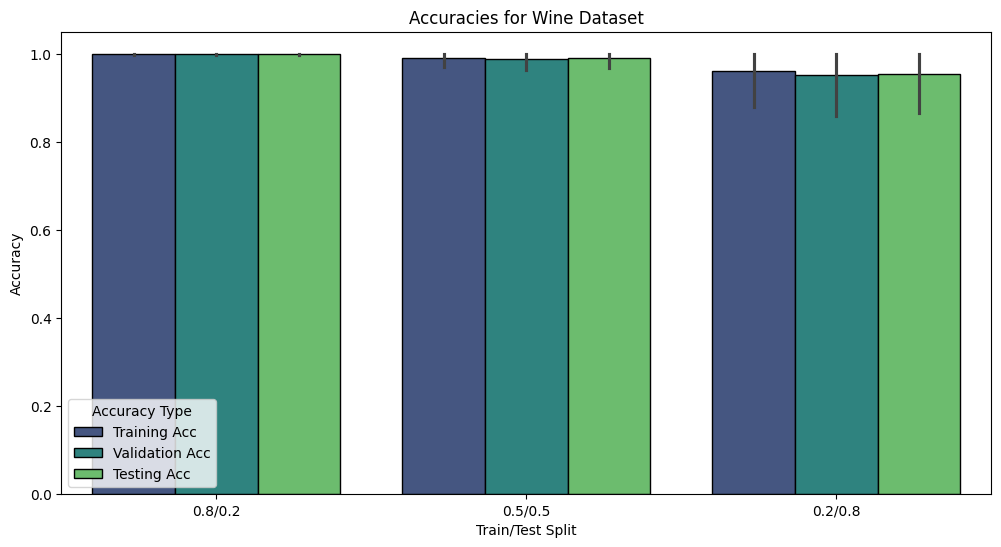

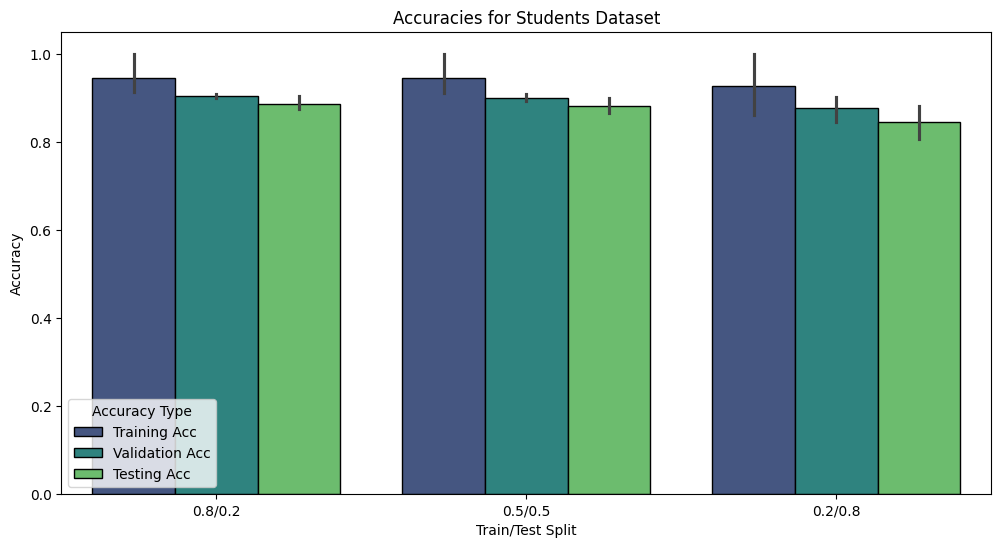

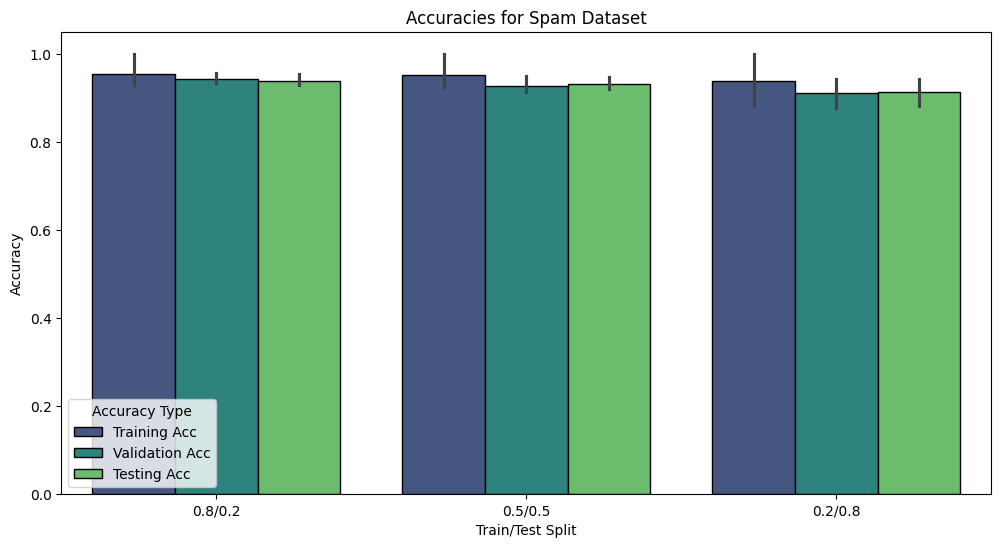

In [46]:

# Function to plot accuracies using a grouped bar chart for each classifier in a dataset
def plot_grouped_bar_accuracies(df, dataset_name):
    # Melting DataFrame for easier plotting
    melted_df = df.melt(id_vars=['Classifier', 'Train/Test Split'], 
                        value_vars=['Training Acc', 'Validation Acc', 'Testing Acc'],
                        var_name='Accuracy Type', value_name='Accuracy')

    # Setting up the plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Train/Test Split', y='Accuracy', hue='Accuracy Type', data=melted_df, 
                palette='viridis', edgecolor='black')

    # Finalizing the plot
    plt.title(f'Accuracies for {dataset_name} Dataset')
    plt.xlabel('Train/Test Split')
    plt.ylabel('Accuracy')
    plt.legend(title='Accuracy Type')
    plt.ylim(0, 1.05)  # Set y-axis limit to show all bars clearly

    plt.show()

# Plotting grouped bar chart accuracy charts for each dataset
plot_grouped_bar_accuracies(combined_wine, 'Wine')
plot_grouped_bar_accuracies(combined_students, 'Students')
plot_grouped_bar_accuracies(combined_spam, 'Spam')

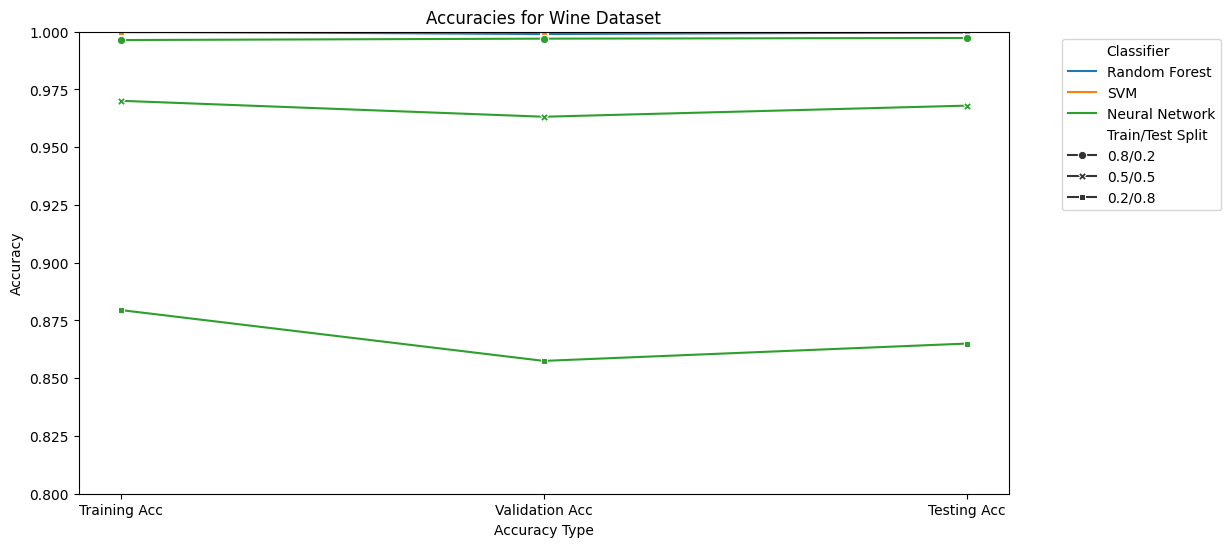

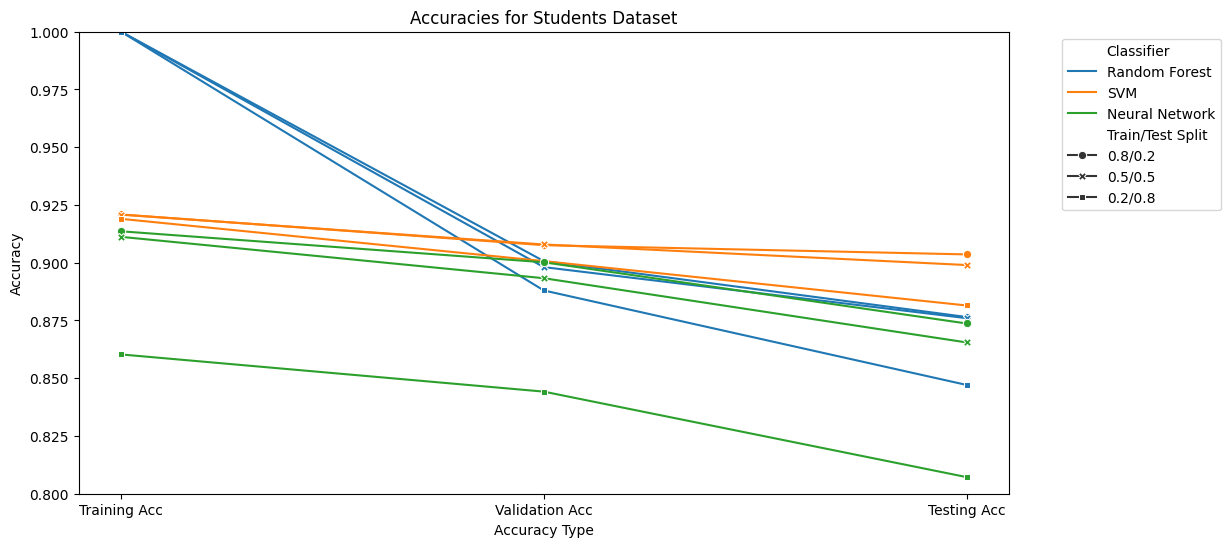

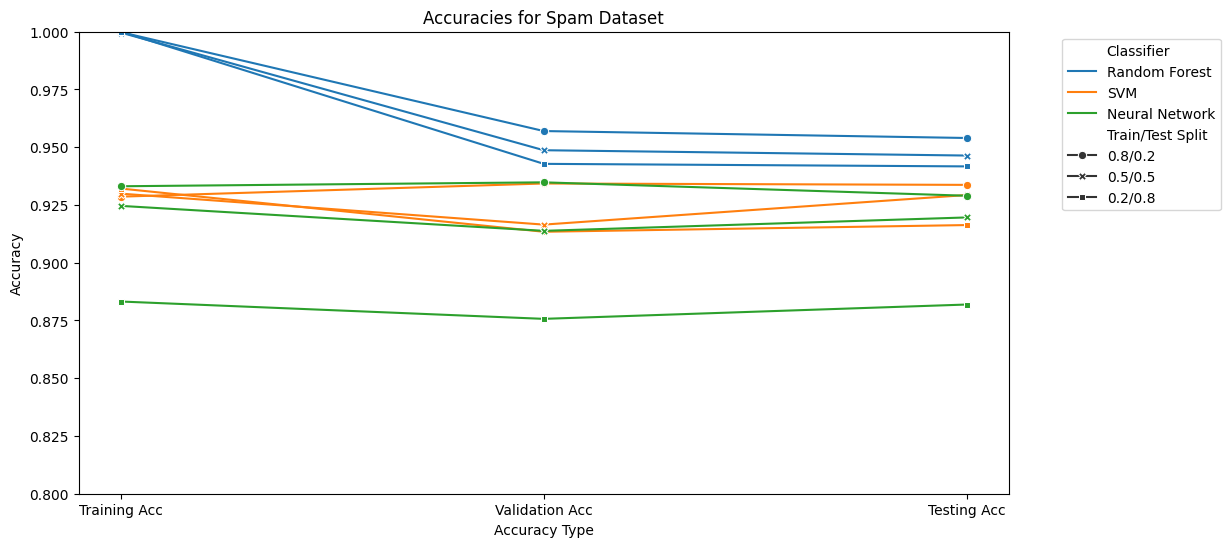

In [49]:
def plot_line_chart_for_dataset(df, dataset_name):
    # Filter DataFrame for the selected dataset
    dataset_df = df[df['Dataset'] == dataset_name]

    # Melting DataFrame for easier plotting
    melted_df = dataset_df.melt(id_vars=['Classifier', 'Train/Test Split'], 
                                value_vars=['Training Acc', 'Validation Acc', 'Testing Acc'],
                                var_name='Accuracy Type', value_name='Accuracy')

    # Setting up the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=melted_df, x='Accuracy Type', y='Accuracy', hue='Classifier', style='Train/Test Split', markers=True, dashes=False)

    # Finalizing the plot
    plt.title(f'Accuracies for {dataset_name} Dataset')
    plt.xlabel('Accuracy Type')
    plt.ylabel('Accuracy')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(0.8, 1.0)  # Adjusting y-axis limit to show accuracies from 0.8 to 1.0

    plt.show()


# Plotting line chart accuracy charts for each dataset
plot_line_chart_for_dataset(combined_summary_all, 'Wine')
plot_line_chart_for_dataset(combined_summary_all, 'Students')
plot_line_chart_for_dataset(combined_summary_all, 'Spam')

## White wine
Partition 0.2 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 1.0, Test Accuracy: 1.0
  SVM - Train Accuracy: 1.0, Val Accuracy: 1.0, Test Accuracy: 1.0
  Neural Network - Train Accuracy: 0.9963837663332621, Val Accuracy: 0.9970238010088602, Test Accuracy: 0.9972789287567139
Partition 0.5 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 1.0, Test Accuracy: 1.0
  SVM - Train Accuracy: 1.0, Val Accuracy: 1.0, Test Accuracy: 1.0
  Neural Network - Train Accuracy: 0.9700527588526408, Val Accuracy: 0.9632465442021688, Test Accuracy: 0.9680272142092387
Partition 0.8 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 0.9990430622009571, Test Accuracy: 0.9996598639455782
  SVM - Train Accuracy: 1.0, Val Accuracy: 1.0, Test Accuracy: 1.0
  Neural Network - Train Accuracy: 0.8795231978098551, Val Accuracy: 0.8575225869814554, Test Accuracy: 0.8649659951527914

## students

Partition 0.2 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 0.9007458405048766, Test Accuracy: 0.8764921946740128
  SVM - Train Accuracy: 0.9209355718180513, Val Accuracy: 0.9076305220883533, Test Accuracy: 0.9035812672176308
  Neural Network - Train Accuracy: 0.9136174519856771, Val Accuracy: 0.9001721143722534, Test Accuracy: 0.8737373550732931
Partition 0.5 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 0.8980716253443526, Test Accuracy: 0.8760330578512395
  SVM - Train Accuracy: 0.9207988980716254, Val Accuracy: 0.9079430670339761, Test Accuracy: 0.8989898989898989
  Neural Network - Train Accuracy: 0.9111570119857788, Val Accuracy: 0.8932506839434305, Test Accuracy: 0.8654729127883911
Partition 0.8 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 0.8879804934021802, Test Accuracy: 0.847107438016529
  SVM - Train Accuracy: 0.9189655172413792, Val Accuracy: 0.9007458405048766, Test Accuracy: 0.8815426997245179
  Neural Network - Train Accuracy: 0.8603448470433553, Val Accuracy: 0.8442340691884359, Test Accuracy: 0.8071625431378683

## spam

Partition 0.2 Results:
  Random Forest - Train Accuracy: 0.9997735507246377, Val Accuracy: 0.9569746376811595, Test Accuracy: 0.9539855072463768
  SVM - Train Accuracy: 0.9285552536231885, Val Accuracy: 0.9343297101449276, Test Accuracy: 0.9336956521739129
  Neural Network - Train Accuracy: 0.93308424949646, Val Accuracy: 0.9347826242446899, Test Accuracy: 0.9289855162302653
Partition 0.5 Results:
  Random Forest - Train Accuracy: 0.9996376811594203, Val Accuracy: 0.9487318840579709, Test Accuracy: 0.946376811594203
  SVM - Train Accuracy: 0.9298913043478261, Val Accuracy: 0.9164855072463768, Test Accuracy: 0.9293478260869565
  Neural Network - Train Accuracy: 0.9246376951535543, Val Accuracy: 0.9137681126594543, Test Accuracy: 0.919565220673879
Partition 0.8 Results:
  Random Forest - Train Accuracy: 1.0, Val Accuracy: 0.9428215579710146, Test Accuracy: 0.9416666666666668
  SVM - Train Accuracy: 0.9320652173913043, Val Accuracy: 0.9133831521739131, Test Accuracy: 0.9163043478260869
  Neural Network - Train Accuracy: 0.88315216700236, Val Accuracy: 0.8756793340047201, Test Accuracy: 0.8818840583165487